In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
# Print a training example
print(type(x_train))
print(x_train[0])
print(y_train[0])

<class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

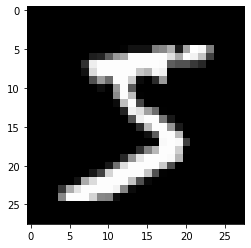

In [4]:
# Visualise image in matlab
plt.imshow(x_train[0], cmap='gray')

In [5]:
# Now let's normalise the data to between 0 and 1
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [7]:
# First thing's first, let's create a function to plot our model's performance over time. What metric should we measure?
# It's a classification problem, and let's check the class distribution we are training and testing on.

countsTrain = np.unique(y_train, return_counts=True)[1]
percentageFrequencyTrain = (countsTrain*100)/len(y_train)
print(percentageFrequencyTrain)

countsTest = np.unique(y_test, return_counts=True)[1]
percentageFrequencyTest = (countsTest*100)/len(y_test)
print(percentageFrequencyTest)

[ 9.87166667 11.23666667  9.93       10.21833333  9.73666667  9.035
  9.86333333 10.44166667  9.75166667  9.915     ]
[ 9.8  11.35 10.32 10.1   9.82  8.92  9.58 10.28  9.74 10.09]


In [8]:
# As the relative frequencies of the classes are similar, we should look at accuracy. Let's create a function to plot
# the accuracy over time.

def plot_accuracy(epochs, metrics):
    fig, ax = plt.subplots()
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Metrics')
    ax.set_title('Training Curve')
    
    for metric in metrics.columns:
        y = metrics[metric]
        ax.plot(epochs, y, label=metric)
        
    ax.legend()

In [9]:
# Let's train a normal DNN and see how well it works.

def create_model_DNN(learning_rate):
    
    model = tf.keras.models.Sequential()
    
    # Flatten the image into an array
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    
    # Simple hidden layers
    model.add(tf.keras.layers.Dense(units=64, activation='relu'))
    model.add(tf.keras.layers.Dense(units=32, activation='relu'))
    model.add(tf.keras.layers.Dense(units=32, activation='relu'))
    
    # Output layer using softmax
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
    
    model.compile(tf.keras.optimizers.Adam(learning_rate=learning_rate), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [10]:
def train_model_DNN(model, features, labels, batch_size, epochs):
    
    history = model.fit(x=features, y=labels, batch_size=batch_size, epochs=epochs, shuffle=True)
    
    epochs = history.epoch
    metrics = pd.DataFrame(history.history)
    return epochs, metrics

Epoch 1/15
469/469 [==============================] - 3s 2ms/step - loss: 0.3033 - accuracy: 0.9080
Epoch 2/15
469/469 [==============================] - 1s 2ms/step - loss: 0.1866 - accuracy: 0.9476
Epoch 3/15
469/469 [==============================] - 1s 2ms/step - loss: 0.1627 - accuracy: 0.9558
Epoch 4/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1543 - accuracy: 0.9586
Epoch 5/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1421 - accuracy: 0.9621
Epoch 6/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1353 - accuracy: 0.9648
Epoch 7/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1357 - accuracy: 0.9649
Epoch 8/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1210 - accuracy: 0.9687
Epoch 9/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1382 - accuracy: 0.9650
Epoch 10/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1177 - accuracy: 0.9703

[0.17219896614551544, 0.9656000137329102]

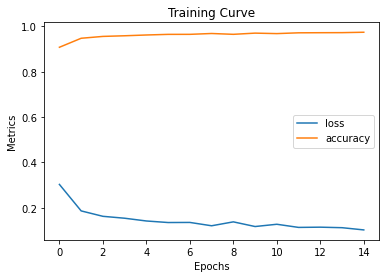

In [11]:
learning_rate = 0.02
batch_size = 128
epochs = 15

# Create and train model
model = create_model_DNN(learning_rate)
epochs, accuracies = train_model_DNN(model, x_train, y_train, batch_size, epochs)
plot_accuracy(epochs, accuracies)

# Evaluate model
model.evaluate(x=x_test, y=y_test, batch_size=batch_size)

In [12]:
# Optimization. Best performance achieved with 3 layers, high number of units in first layer - 64, then less in the 
# following layers, 32.

In [32]:
# Now time to try a CNN!
def create_model_CNN(learning_rate):
    
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(filters=24, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(filters=48, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=256, activation='relu'))
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
                  loss='sparse_categorical_crossentropy', 
                  metrics='accuracy')
    
    return model

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],x_train.shape[2], 1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],x_test.shape[2], 1))

In [15]:
def train_model_CNN(model, features, labels, batch_size, epochs):
    
    history = model.fit(x=features, y=labels, batch_size=batch_size, epochs=epochs, shuffle=True)
    
    epochs = history.epoch
    metrics = pd.DataFrame(history.history)
    
    return epochs, metrics

Epoch 1/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2684 - accuracy: 0.9257
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0760 - accuracy: 0.9769
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0642 - accuracy: 0.9808
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0617 - accuracy: 0.9816
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0648 - accuracy: 0.9813
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0623 - accuracy: 0.9826
Epoch 7/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0682 - accuracy: 0.9811
Epoch 8/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0644 - accuracy: 0.9828
Epoch 9/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0648 - accuracy: 0.9830
Epoch 10/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0637 - accuracy: 0.9833

[0.12973199784755707, 0.9765999913215637]

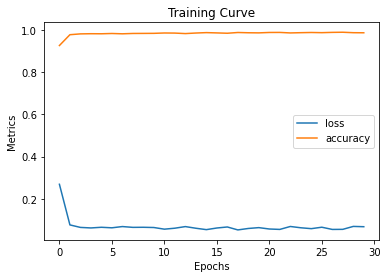

In [34]:
learning_rate = 0.01
batch_size = 128
epochs = 30

model = create_model_CNN(learning_rate)
epochs, metrics = train_model_CNN(model, x_train, y_train, batch_size, epochs)
plot_accuracy(epochs, metrics)

model.evaluate(x=x_test, y=y_test, batch_size=batch_size)